In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [5]:
df.shape

(3555, 18)

In [6]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat   tata gurgaon gateway  sector 113   3.21         11823.0   
1          flat     ambience creacions   sector 22   1.99         15547.0   
2          flat   shree vardhman flora   sector 90   0.65          6792.0   
3          flat  ss radiance residency   sector 12   0.60          5660.0   
4          flat          pioneer araya   sector 62   7.56         18000.0   

   bedRoom  bathroom balcony  floorNum   agePossession  built_up_area  \
0        3         3       3       9.0    New Property         2281.0   
1        2         2       2       9.0    New Property         1285.0   
2        2         2       3       9.0  Relatively New         1050.0   
3        3         3       2       3.0  Relatively New         1178.0   
4        4         4      3+      23.0  Relatively New         4200.0   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           0             0           0           0       0                1   
1           0             0           0           0       0                1   
2           1             0           0           0       0                1   
3           0             0           0           0       0                1   
4           0             1           0           1       0                0   

   luxury_score  
0            49  
1            49  
2            67  
3            44  
4            87

In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat  sector 113   3.21        3         3       3       9.0   
1          flat   sector 22   1.99        2         2       2       9.0   
2          flat   sector 90   0.65        2         2       3       9.0   
3          flat   sector 12   0.60        3         3       2       3.0   
4          flat   sector 62   7.56        4         4      3+      23.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property         2281.0           0             0           0   
1    New Property         1285.0           0             0           0   
2  Relatively New         1050.0           1             0           0   
3  Relatively New         1178.0           0             0           0   
4  Relatively New         4200.0           0             1           0   

   pooja room  others  furnishing_type  luxury_score  
0           0       0                1            49  
1           0       0                1            49  
2           0       0                1            67  
3           0       0                1            44  
4           1       0                0            87

### luxury score

<Axes: ylabel='luxury_score'>

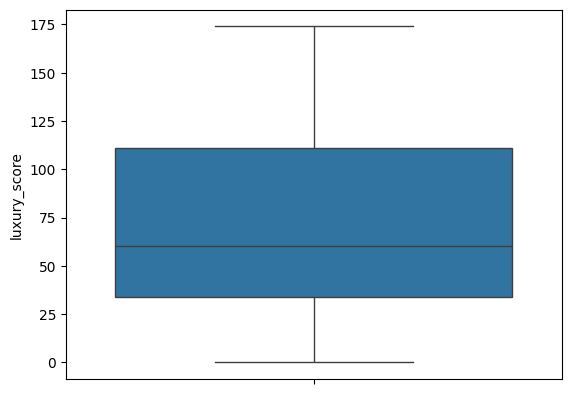

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins
        

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()


property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat  sector 113   3.21        3         3       3       9.0   
1          flat   sector 22   1.99        2         2       2       9.0   
2          flat   sector 90   0.65        2         2       3       9.0   
3          flat   sector 12   0.60        3         3       2       3.0   
4          flat   sector 62   7.56        4         4      3+      23.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property         2281.0           0             0           0   
1    New Property         1285.0           0             0           0   
2  Relatively New         1050.0           1             0           0   
3  Relatively New         1178.0           0             0           0   
4  Relatively New         4200.0           0             1           0   

   pooja room  others  furnishing_type  luxury_score luxury_category  
0           0       0                1            49             Low  
1           0       0                1            49             Low  
2           0       0                1            67          Medium  
3           0       0                1            44             Low  
4           1       0                0            87          Medium

### floorNum

<Axes: ylabel='floorNum'>

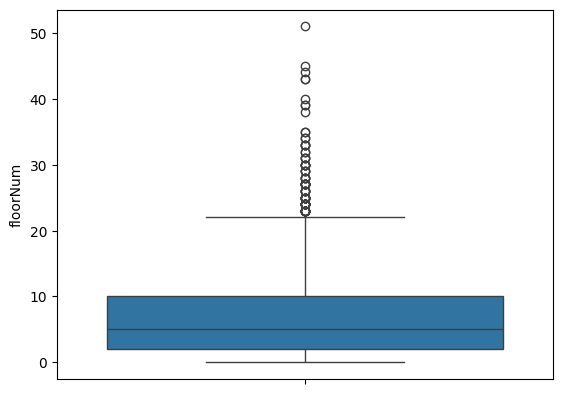

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()


property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat  sector 113   3.21        3         3       3       9.0   
1          flat   sector 22   1.99        2         2       2       9.0   
2          flat   sector 90   0.65        2         2       3       9.0   
3          flat   sector 12   0.60        3         3       2       3.0   
4          flat   sector 62   7.56        4         4      3+      23.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property         2281.0           0             0           0   
1    New Property         1285.0           0             0           0   
2  Relatively New         1050.0           1             0           0   
3  Relatively New         1178.0           0             0           0   
4  Relatively New         4200.0           0             1           0   

   pooja room  others  furnishing_type  luxury_score luxury_category  \
0           0       0                1            49             Low   
1           0       0                1            49             Low   
2           0       0                1            67          Medium   
3           0       0                1            44             Low   
4           1       0                0            87          Medium   

  floor_category  
0      Mid Floor  
1      Mid Floor  
2      Mid Floor  
3      Mid Floor  
4     High Floor

In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony   agePossession  \
0          flat  sector 113   3.21        3         3       3    New Property   
1          flat   sector 22   1.99        2         2       2    New Property   
2          flat   sector 90   0.65        2         2       3  Relatively New   
3          flat   sector 12   0.60        3         3       2  Relatively New   
4          flat   sector 62   7.56        4         4      3+  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         2281.0           0             0           0           0       0   
1         1285.0           0             0           0           0       0   
2         1050.0           1             0           0           0       0   
3         1178.0           0             0           0           0       0   
4         4200.0           0             1           0           1       0   

   furnishing_type luxury_category floor_category  
0                1             Low      Mid Floor  
1                1             Low      Mid Floor  
2                1          Medium      Mid Floor  
3                1             Low      Mid Floor  
4                0          Medium     High Floor

In [53]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Assuming train_df is already loaded and contains the target column 'price'

# Step 1: Copy the original DataFrame
data_label_encoded = train_df.copy()

# Step 2: Label encode categorical columns using OrdinalEncoder
categorical_cols = data_label_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(f"{col} categories:", oe.categories_)

# Step 3: Split features and target
X_label_imputed = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

# Step 4: Check and handle missing values
# Option 1: Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_label = pd.DataFrame(imputer.fit_transform(X_label), columns=X_label.columns)


property_type categories: [array(['flat', 'house'], dtype=object)]
sector categories: [array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'secto

In [55]:
print("Missing values per column:")
print(X_label.isna().sum())


Missing values per column:
property_type      0
sector             0
bedRoom            0
bathroom           0
balcony            0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_category    0
floor_category     0
dtype: int64


In [56]:
X_label_imputed

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    19.0        3         3      3.0            1.0   
1               0.0    29.0        2         2      2.0            1.0   
2               0.0   105.0        2         2      3.0            3.0   
3               0.0    20.0        3         3      2.0            3.0   
4               0.0    72.0        4         4      4.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3550            1.0     5.0        4         3      2.0            0.0   
3551            1.0    29.0        7         5      4.0            2.0   
3552            0.0    41.0        2         2      2.0            4.0   
3553            1.0    66.0        9         9      4.0            1.0   
3554            0.0    97.0        3         3      3.0            3.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0            2281.0           0             0           0           0       0   
1            1285.0           0             0           0           0       0   
2            1050.0           1             0           0           0       0   
3            1178.0           0             0           0           0       0   
4            4200.0           0             1           0           1       0   
...             ...         ...           ...         ...         ...     ...   
3550         1284.0           0             0           0           0       0   
3551         2367.0           0             0           0           1       1   
3552         1533.0           0             0           0           0       0   
3553            NaN           0             1           0           1       1   
3554         1549.0           0             1           0           0       0   

      furnishing_type  luxury_category  floor_category  
0                   1              1.0             2.0  
1                   1              1.0             2.0  
2                   1              2.0             2.0  
3                   1              1.0             2.0  
4                   0              2.0             0.0  
...               ...              ...             ...  
3550                1              1.0             2.0  
3551                0              1.0             2.0  
3552                1              2.0             0.0  
3553                0              1.0             1.0  
3554                0              2.0             2.0  

[3555 rows x 15 columns]

In [57]:
y_label

0       3.21
1       1.99
2       0.65
3       0.60
4       7.56
        ... 
3550    1.85
3551    4.75
3552    1.10
3553    7.25
3554    1.80
Name: price, Length: 3555, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

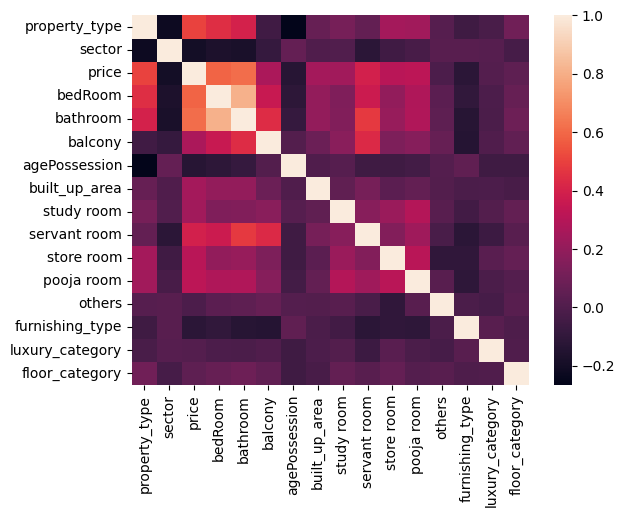

In [58]:
 sns.heatmap(data_label_encoded.corr())

In [59]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

feature  corr_coeff
0            sector   -0.200631
1             price    1.000000
2           bedRoom    0.589270
3          bathroom    0.612050
4           balcony    0.271771
5     agePossession   -0.136676
6     built_up_area    0.249319
7        study room    0.240298
8      servant room    0.393256
9        store room    0.309359
10       pooja room    0.322217
11           others   -0.013719
12  furnishing_type   -0.118073
13  luxury_category    0.011002
14   floor_category    0.044976

### Technique 2 - Random Forest Feature Importance

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
2           bedRoom       0.354362
6     built_up_area       0.190118
1            sector       0.142679
8      servant room       0.070261
0     property_type       0.057929
3          bathroom       0.052011
5     agePossession       0.028610
4           balcony       0.021887
12  furnishing_type       0.019199
13  luxury_category       0.013253
7        study room       0.012821
14   floor_category       0.012282
10       pooja room       0.009349
9        store room       0.009123
11           others       0.006116

### Technique 3 - Gradient Boosting Feature importances

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label_imputed.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
2           bedRoom       0.358554
6     built_up_area       0.167128
1            sector       0.150221
3          bathroom       0.114546
0     property_type       0.109815
8      servant room       0.078613
7        study room       0.005603
5     agePossession       0.003961
9        store room       0.003857
12  furnishing_type       0.002468
4           balcony       0.001679
14   floor_category       0.001661
10       pooja room       0.001207
13  luxury_category       0.000575
11           others       0.000112

### Technique 4 - Permutation Importance

In [63]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

feature  permutation_importance
6     built_up_area                0.198062
2           bedRoom                0.191753
0     property_type                0.160483
1            sector                0.109895
8      servant room                0.057285
3          bathroom                0.052487
4           balcony                0.021359
7        study room                0.005846
10       pooja room                0.003809
14   floor_category                0.003032
13  luxury_category                0.001621
11           others               -0.001384
12  furnishing_type               -0.002935
9        store room               -0.005788
5     agePossession               -0.006262

### Technique 5 - LASSO

In [64]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


feature  lasso_coeff
0     property_type     0.775879
3          bathroom     0.642024
2           bedRoom     0.440320
8      servant room     0.410180
9        store room     0.259174
7        study room     0.234994
6     built_up_area     0.152370
10       pooja room     0.130613
13  luxury_category     0.074759
4           balcony     0.060701
5     agePossession    -0.010190
12  furnishing_type    -0.035678
11           others    -0.055944
14   floor_category    -0.072223
1            sector    -0.117163

### Technique 6 - RFE

In [65]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


feature  rfe_score
2           bedRoom   0.357460
6     built_up_area   0.192778
1            sector   0.142298
8      servant room   0.071533
0     property_type   0.056680
3          bathroom   0.050796
5     agePossession   0.026721
4           balcony   0.022584
12  furnishing_type   0.020153
14   floor_category   0.012333
13  luxury_category   0.011835
7        study room   0.010869
9        store room   0.009080
10       pooja room   0.008935
11           others   0.005944

### Technique 7 - Linear Regression Weights

In [67]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


feature  reg_coeffs
0     property_type    0.781693
3          bathroom    0.639419
2           bedRoom    0.440919
8      servant room    0.413245
9        store room    0.261867
7        study room    0.241570
6     built_up_area    0.160826
10       pooja room    0.133992
13  luxury_category    0.084662
4           balcony    0.067567
5     agePossession   -0.017558
12  furnishing_type   -0.043126
11           others   -0.065634
14   floor_category   -0.083846
1            sector   -0.124766

### Technique 8 - SHAP

In [68]:
!pip install shap

   ---------------------------------------- 0.0/544.3 kB ? eta -:--:--
   ---------------------------------------- 544.3/544.3 kB 8.8 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [cloudpickle]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   ---------------------------------------- 3/3 [shap]



In [69]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.23010461,  0.26050587, -0.21958663, ..., -0.02292003,
         0.01919238, -0.05526357],
       [-0.09087043,  0.32798165, -0.33274855, ..., -0.00764097,
        -0.00569441, -0.01865454],
       [-0.10778982, -0.41710705, -0.43459155, ..., -0.01118629,
         0.00934615, -0.00344355],
       ...,
       [-0.10750073,  0.09653471, -0.44839186, ..., -0.00833297,
         0.00671857,  0.01437142],
       [ 0.90738959, -0.64022524,  2.80780144, ...,  0.03997621,
        -0.02766129,  0.0962028 ],
       [-0.17900592, -0.22021165, -0.35902951, ...,  0.03372807,
         0.00383261,  0.0119702 ]])

In [70]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

feature  SHAP_score
6     built_up_area    0.707815
2           bedRoom    0.650434
1            sector    0.382981
0     property_type    0.357738
8      servant room    0.239251
3          bathroom    0.134573
4           balcony    0.053244
7        study room    0.041022
5     agePossession    0.036195
14   floor_category    0.031783
12  furnishing_type    0.030239
10       pooja room    0.024937
13  luxury_category    0.022236
9        store room    0.018583
11           others    0.007668

In [71]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [72]:
final_fi_df


corr_coeff  rf_importance  gb_importance  \
feature                                                     
sector            -0.200631       0.142679       0.150221   
bedRoom            0.589270       0.354362       0.358554   
bathroom           0.612050       0.052011       0.114546   
balcony            0.271771       0.021887       0.001679   
agePossession     -0.136676       0.028610       0.003961   
built_up_area      0.249319       0.190118       0.167128   
study room         0.240298       0.012821       0.005603   
servant room       0.393256       0.070261       0.078613   
store room         0.309359       0.009123       0.003857   
pooja room         0.322217       0.009349       0.001207   
others            -0.013719       0.006116       0.000112   
furnishing_type   -0.118073       0.019199       0.002468   
luxury_category    0.011002       0.013253       0.000575   
floor_category     0.044976       0.012282       0.001661   

                 permutation_importance  lasso_coeff  rfe_score  reg_coeffs  \
feature                                                                       
sector                         0.109895    -0.117163   0.142298   -0.124766   
bedRoom                        0.191753     0.440320   0.357460    0.440919   
bathroom                       0.052487     0.642024   0.050796    0.639419   
balcony                        0.021359     0.060701   0.022584    0.067567   
agePossession                 -0.006262    -0.010190   0.026721   -0.017558   
built_up_area                  0.198062     0.152370   0.192778    0.160826   
study room                     0.005846     0.234994   0.010869    0.241570   
servant room                   0.057285     0.410180   0.071533    0.413245   
store room                    -0.005788     0.259174   0.009080    0.261867   
pooja room                     0.003809     0.130613   0.008935    0.133992   
others                        -0.001384    -0.055944   0.005944   -0.065634   
furnishing_type               -0.002935    -0.035678   0.020153   -0.043126   
luxury_category                0.001621     0.074759   0.011835    0.084662   
floor_category                 0.003032    -0.072223   0.012333   -0.083846   

                 SHAP_score  
feature                      
sector             0.382981  
bedRoom            0.650434  
bathroom           0.134573  
balcony            0.053244  
agePossession      0.036195  
built_up_area      0.707815  
study room         0.041022  
servant room       0.239251  
store room         0.018583  
pooja room         0.024937  
others             0.007668  
furnishing_type    0.030239  
luxury_category    0.022236  
floor_category     0.031783

In [73]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [74]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
bedRoom            0.347204
built_up_area      0.241238
sector             0.161336
servant room       0.086063
bathroom           0.075546
balcony            0.021078
agePossession      0.013678
study room         0.011591
furnishing_type    0.010510
floor_category     0.009230
luxury_category    0.007836
pooja room         0.007457
store room         0.004448
others             0.002787
dtype: float64

In [75]:
# to drop pooja room, study room, others
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    19.0      3.0       3.0      3.0            1.0   
1               0.0    29.0      2.0       2.0      2.0            1.0   
2               0.0   105.0      2.0       2.0      3.0            3.0   
3               0.0    20.0      3.0       3.0      2.0            3.0   
4               0.0    72.0      4.0       4.0      4.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3550            1.0     5.0      4.0       3.0      2.0            0.0   
3551            1.0    29.0      7.0       5.0      4.0            2.0   
3552            0.0    41.0      2.0       2.0      2.0            4.0   
3553            1.0    66.0      9.0       9.0      4.0            1.0   
3554            0.0    97.0      3.0       3.0      3.0            3.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0       2281.000000         0.0           0.0         0.0         0.0     0.0   
1       1285.000000         0.0           0.0         0.0         0.0     0.0   
2       1050.000000         1.0           0.0         0.0         0.0     0.0   
3       1178.000000         0.0           0.0         0.0         0.0     0.0   
4       4200.000000         0.0           1.0         0.0         1.0     0.0   
...             ...         ...           ...         ...         ...     ...   
3550    1284.000000         0.0           0.0         0.0         0.0     0.0   
3551    2367.000000         0.0           0.0         0.0         1.0     1.0   
3552    1533.000000         0.0           0.0         0.0         0.0     0.0   
3553    1892.651804         0.0           1.0         0.0         1.0     1.0   
3554    1549.000000         0.0           1.0         0.0         0.0     0.0   

      furnishing_type  luxury_category  floor_category  
0                 1.0              1.0             2.0  
1                 1.0              1.0             2.0  
2                 1.0              2.0             2.0  
3                 1.0              1.0             2.0  
4                 0.0              2.0             0.0  
...               ...              ...             ...  
3550              1.0              1.0             2.0  
3551              0.0              1.0             2.0  
3552              1.0              2.0             0.0  
3553              0.0              1.0             1.0  
3554              0.0              2.0             2.0  

[3555 rows x 15 columns]

In [76]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [77]:
scores.mean()

np.float64(0.6915105783623187)

In [78]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [79]:
scores.mean()

np.float64(0.6868670195243716)

In [80]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [81]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [82]:
export_df

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    19.0      3.0       3.0      3.0            1.0   
1               0.0    29.0      2.0       2.0      2.0            1.0   
2               0.0   105.0      2.0       2.0      3.0            3.0   
3               0.0    20.0      3.0       3.0      2.0            3.0   
4               0.0    72.0      4.0       4.0      4.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3550            1.0     5.0      4.0       3.0      2.0            0.0   
3551            1.0    29.0      7.0       5.0      4.0            2.0   
3552            0.0    41.0      2.0       2.0      2.0            4.0   
3553            1.0    66.0      9.0       9.0      4.0            1.0   
3554            0.0    97.0      3.0       3.0      3.0            3.0   

      built_up_area  servant room  store room  furnishing_type  \
0       2281.000000           0.0         0.0              1.0   
1       1285.000000           0.0         0.0              1.0   
2       1050.000000           0.0         0.0              1.0   
3       1178.000000           0.0         0.0              1.0   
4       4200.000000           1.0         0.0              0.0   
...             ...           ...         ...              ...   
3550    1284.000000           0.0         0.0              1.0   
3551    2367.000000           0.0         0.0              0.0   
3552    1533.000000           0.0         0.0              1.0   
3553    1892.651804           1.0         0.0              0.0   
3554    1549.000000           1.0         0.0              0.0   

      luxury_category  floor_category  price  
0                 1.0             2.0   3.21  
1                 1.0             2.0   1.99  
2                 2.0             2.0   0.65  
3                 1.0             2.0   0.60  
4                 2.0             0.0   7.56  
...               ...             ...    ...  
3550              1.0             2.0   1.85  
3551              1.0             2.0   4.75  
3552              2.0             0.0   1.10  
3553              1.0             1.0   7.25  
3554              2.0             2.0   1.80  

[3555 rows x 13 columns]